# Gemstone Price Prediction of Germany from Co-Learning Lounge
### Problem Statement
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the basis of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have a better profit share. Also, provide them with the best 5 attributes that are most important.

Link: https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

### 1 Import of Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install openpyxl
import warnings
warnings.filterwarnings('ignore')

                                              0.0/250.0 kB ? eta -:--:--
                                              0.0/250.0 kB ? eta -:--:--
     -                                        10.2/250.0 kB ? eta -:--:--
     -                                        10.2/250.0 kB ? eta -:--:--
     ----------                            71.7/250.0 kB 558.5 kB/s eta 0:00:01
     -----------------                    122.9/250.0 kB 717.5 kB/s eta 0:00:01
     -------------------------            174.1/250.0 kB 807.1 kB/s eta 0:00:01
     ----------------------------         194.6/250.0 kB 841.6 kB/s eta 0:00:01
     ------------------------------------ 250.0/250.0 kB 807.2 kB/s eta 0:00:00


Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('data/gemstonedataset.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [14]:
# Let's observe the data dictionary to find more about the dataset
pd.read_excel('data/Data Dictionary.xlsx')

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


### 2 Check Missing values

In [15]:
df.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

There are 697 missing values in the depth column

In [16]:
# Numerical columns
num_cols = list(df._get_numeric_data().columns)
print(num_cols)

['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']


In [17]:
# Categorical columns
cat_cols = set(df.columns) - set(num_cols)
print(cat_cols)

{'clarity', 'cut', 'color'}


### 3 Data Cleaning

#### Let us drop the unannamed colum


In [19]:
df = df.drop(labels=['Unnamed: 0'],axis=1)

In [20]:
# Drop the rows with null values
df = df.dropna()

# Display the total number of null values in the resulting dataframe
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [21]:
# It's also a good idea to drop duplicate rows:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26236 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26236 non-null  float64
 1   cut      26236 non-null  object 
 2   color    26236 non-null  object 
 3   clarity  26236 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26236 non-null  float64
 6   x        26236 non-null  float64
 7   y        26236 non-null  float64
 8   z        26236 non-null  float64
 9   price    26236 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


### 3 Exploring data
Lets separate the numerical data and the categorical column

In [22]:
numerical_columns = list(df.columns[df.dtypes!='object'])
categorical_columns = list(df.columns[df.dtypes=='object'])
print(f'Numerical Columns   : {numerical_columns}')
print(f'Categorical Columns : {categorical_columns}')

Numerical Columns   : ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']
Categorical Columns : ['cut', 'color', 'clarity']


In [23]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Let us check the categories of the categorical variables

In [24]:
print("Categories in 'cut' variable:  ",end=" ")
print(df['cut'].unique())

print("\n")

print("Categories in'color' variable:",end=" " )
print(df['color'].unique())

print("\n")

print("Categories in 'clarity' variable:     ",end=" " )
print(df['clarity'].unique())

print("\n")


Categories in 'cut' variable:   ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']


Categories in'color' variable: ['E' 'G' 'F' 'D' 'H' 'J' 'I']


Categories in 'clarity' variable:      ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']




#### Numerical column description

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26236.0,0.797620,0.476691,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26236.0,57.455877,2.230866,49.0,56.00,57.00,59.00,79.00
x,26236.0,5.728646,1.126332,0.0,4.71,5.69,6.54,10.23
y,26236.0,5.732487,1.165283,0.0,4.72,5.70,6.54,58.90
z,26236.0,3.536339,0.698608,0.0,2.90,3.52,4.04,8.06
price,26236.0,3935.926818,4019.809223,326.0,945.00,2374.00,5356.00,18818.00


#### Categorical Column Description

In [26]:
df[categorical_columns].describe().T

,count,unique,top,freq
cut,26236,5,Ideal,10535
color,26236,7,G,5521
clarity,26236,8,SI1,6402


#### Unique values in the dataset

In [27]:
df.nunique()

carat       256
cut           5
color         7
clarity       8
depth       169
table       112
x           530
y           525
z           354
price      8629
dtype: int64

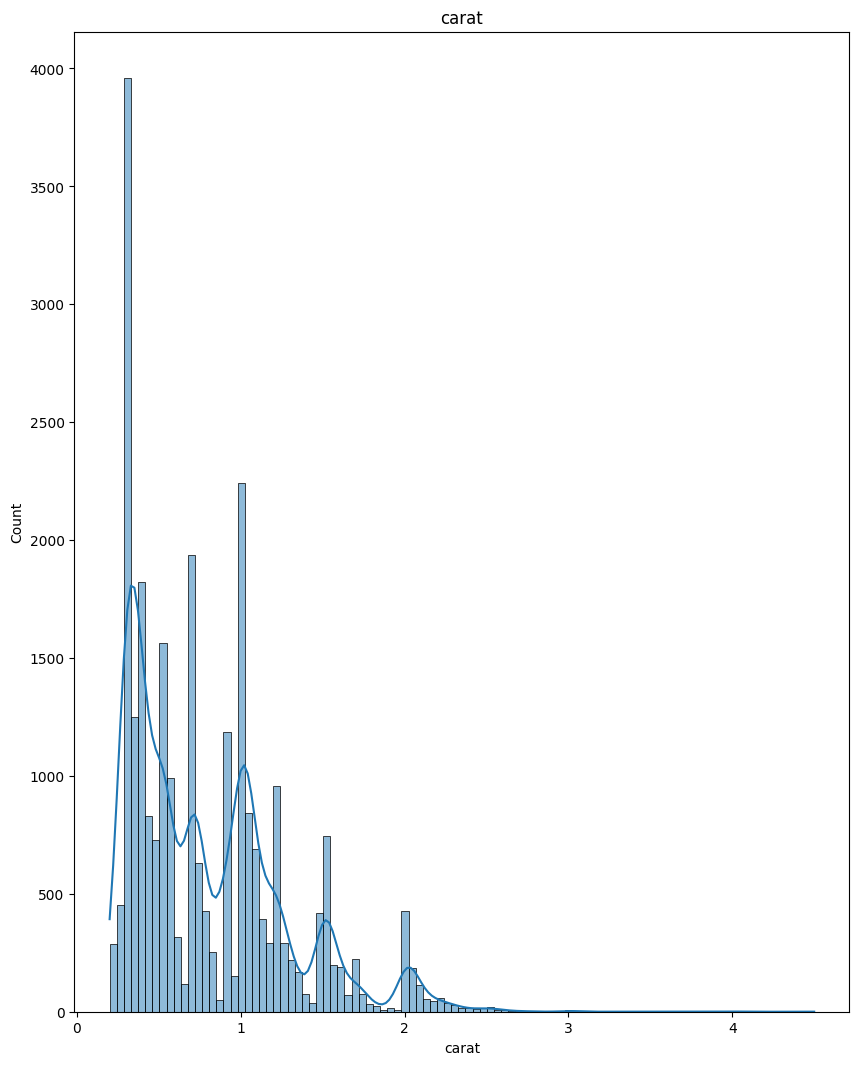

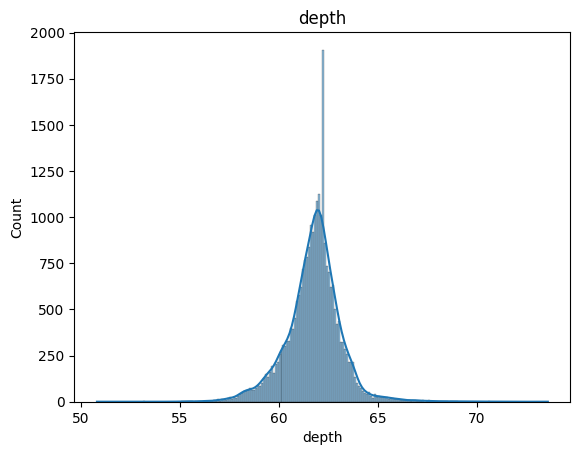

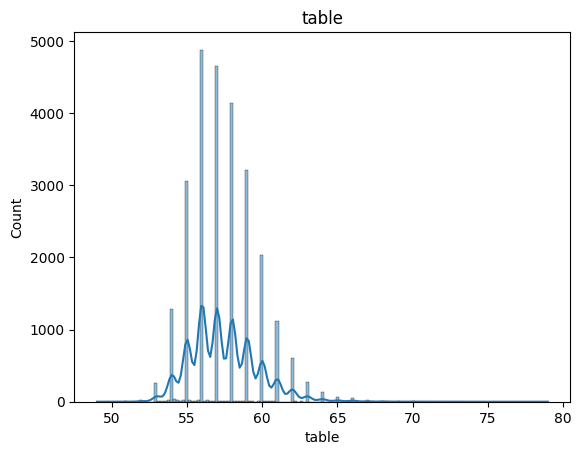

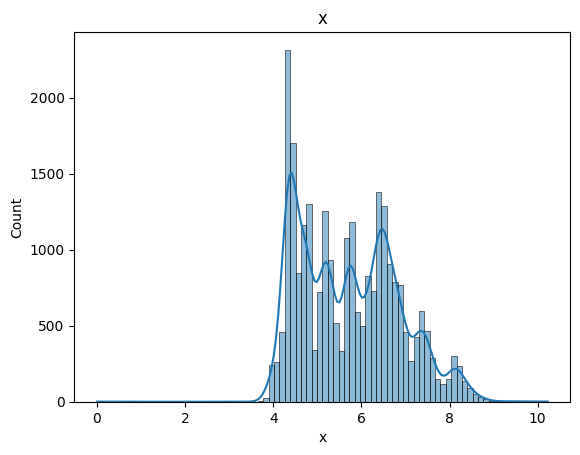

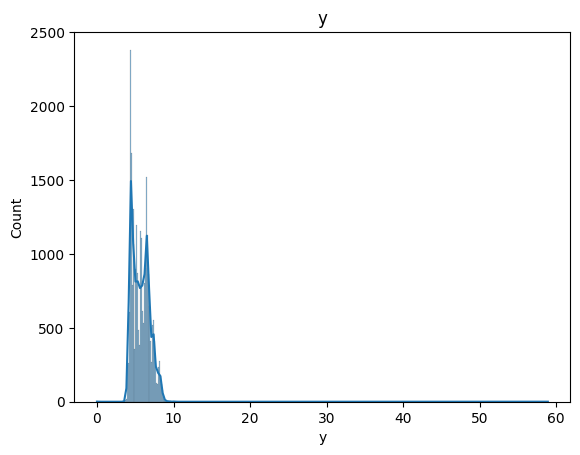

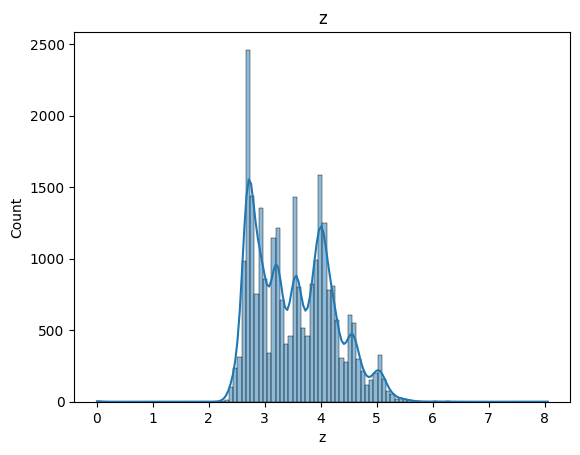

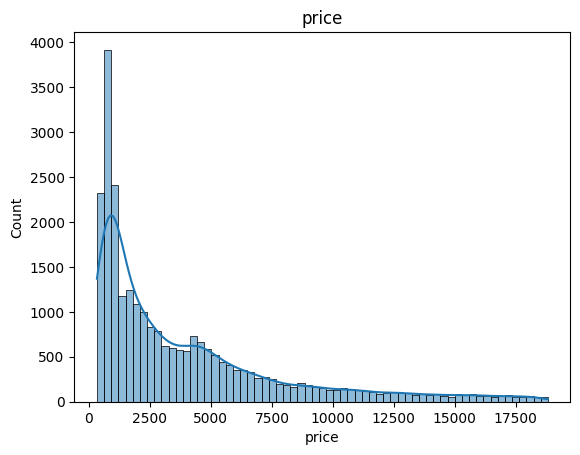

In [28]:
#Unvariate Analysis of the Numerical Variable
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
x = 1
for i in numerical_columns:
    sb.histplot(data = df, x = i, kde=True)
    plt.title(i)
    print('\n')
    plt.show()

Univariate analysis of the categorical column

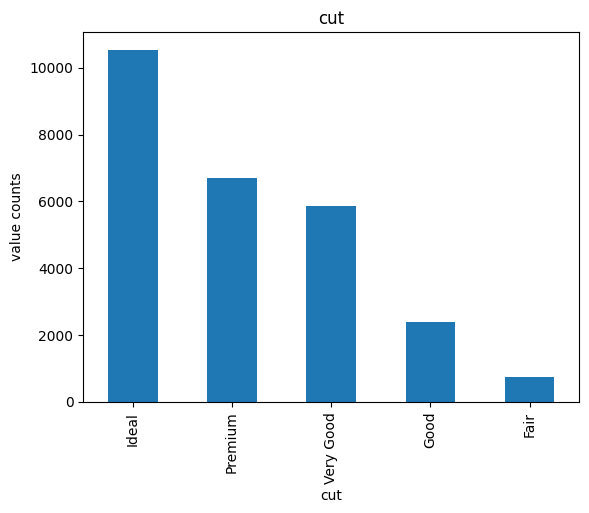

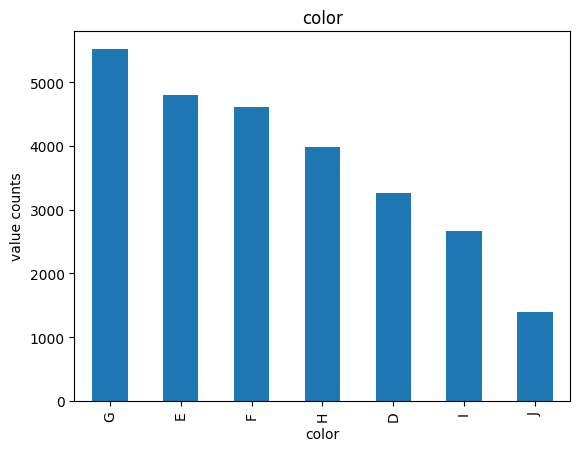

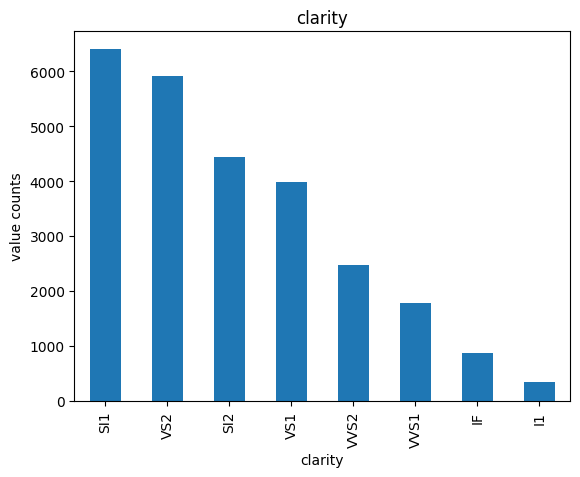

In [29]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

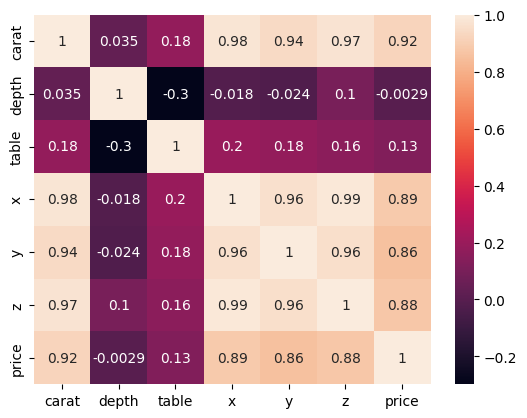

In [30]:
# Correlation heatmap
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

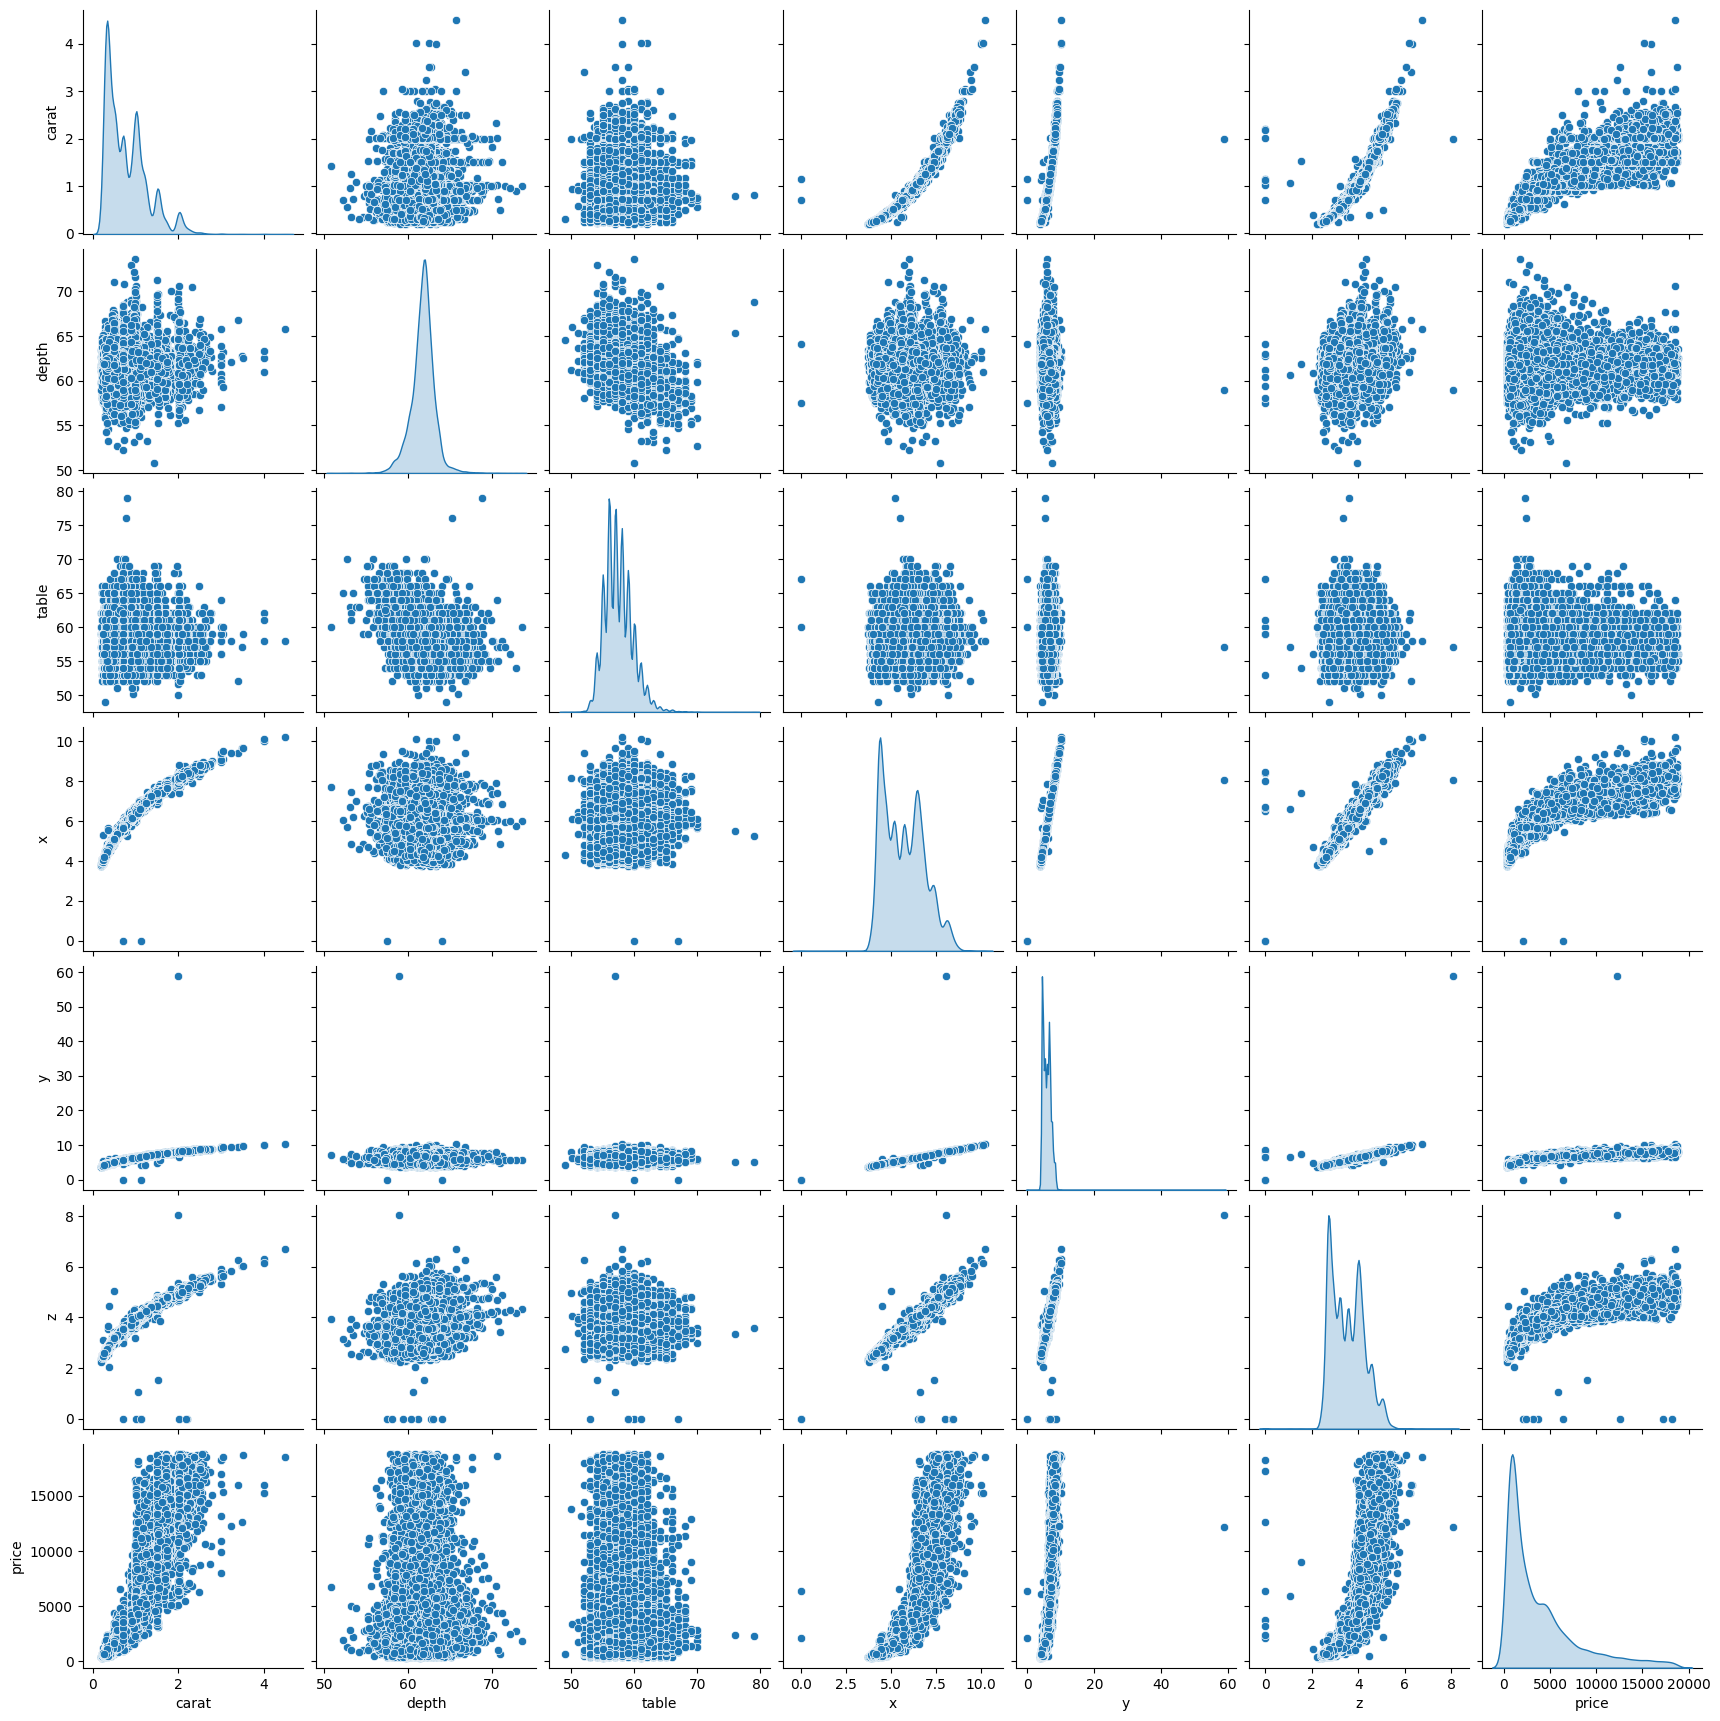

In [31]:
# Pairplot
sb.pairplot(df,diag_kind='kde')
plt.show()

In [32]:
df.describe()

,carat,depth,table,x,y,z,price
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


### 4 Analyzing variables

#### Categorical Features vs Target Feature Price Boxplot

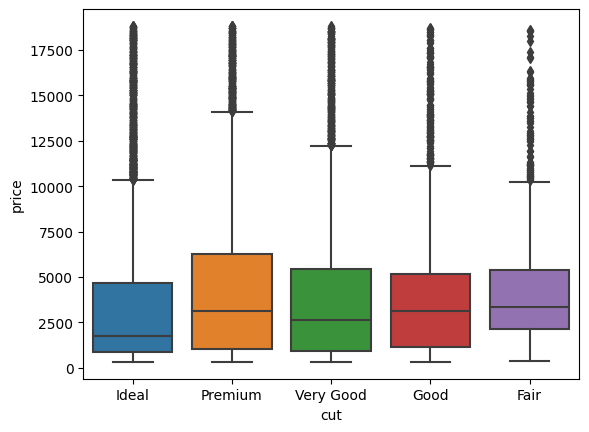

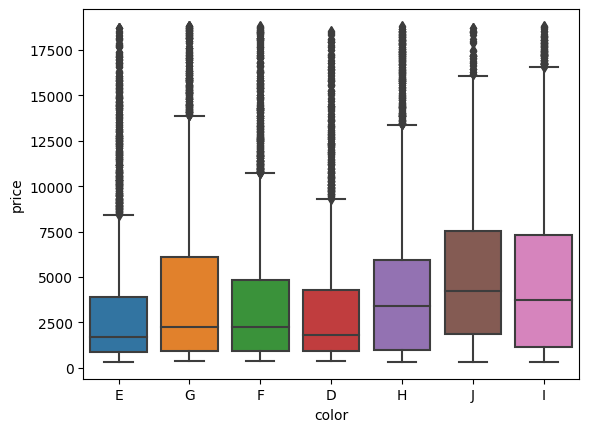

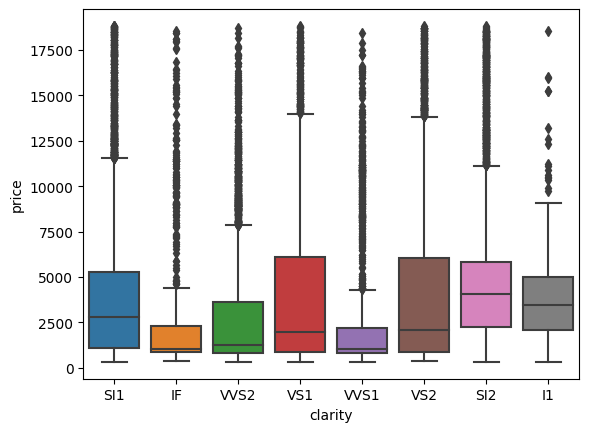

In [33]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='price')
    plt.show()

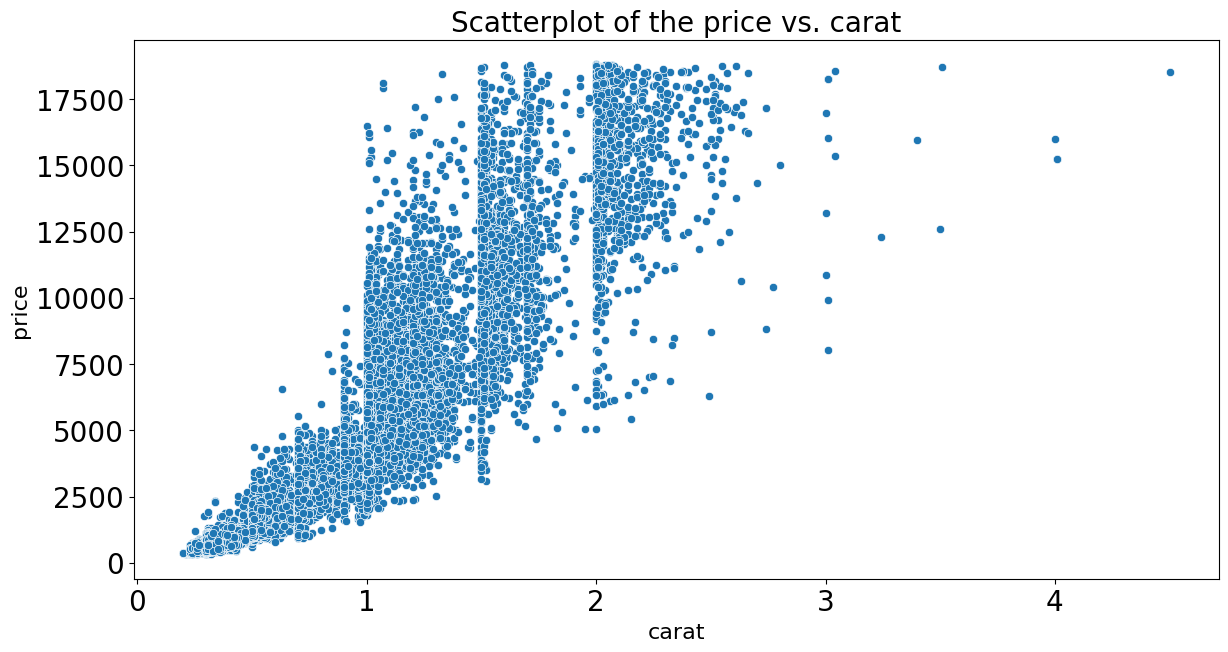

In [34]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = df.carat, y = df.price)

plt.xlabel('carat', fontsize=16);
plt.ylabel('price', fontsize=16);
plt.title('Scatterplot of the price vs. carat', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.show()

Observation: The price seems to increase with the increase in carat

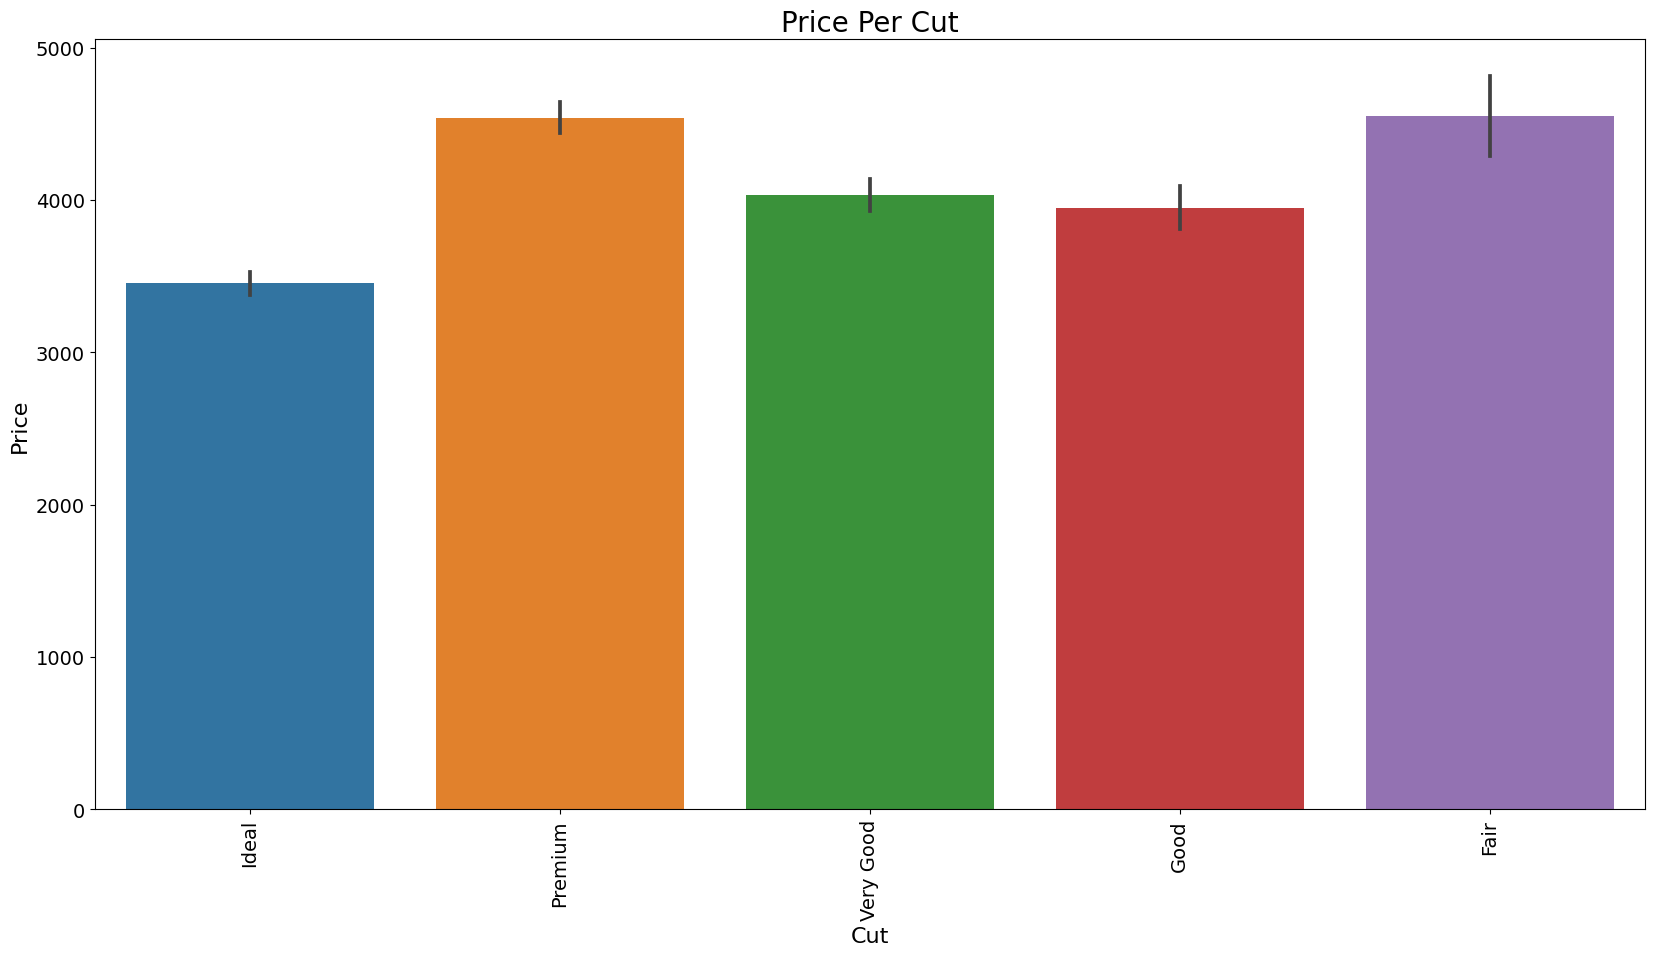

In [36]:
# Set the figure size
plt.figure(figsize=(20,10))

# Draw a barplot using seaborn
sns.barplot(data=df, x=df['cut'], y = df['price'])

# Note that we could have achieved the same result using pandas:
#mean_price_per_manuf.plot(kind = 'bar')

# Rotate the tick labels on the x-axis by 90 degrees
plt.xticks(rotation=90)

# Set the labels fonts and font sizes
plt.xlabel('Cut', fontsize=16);
plt.ylabel('Price', fontsize=16);
plt.title('Price Per Cut', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

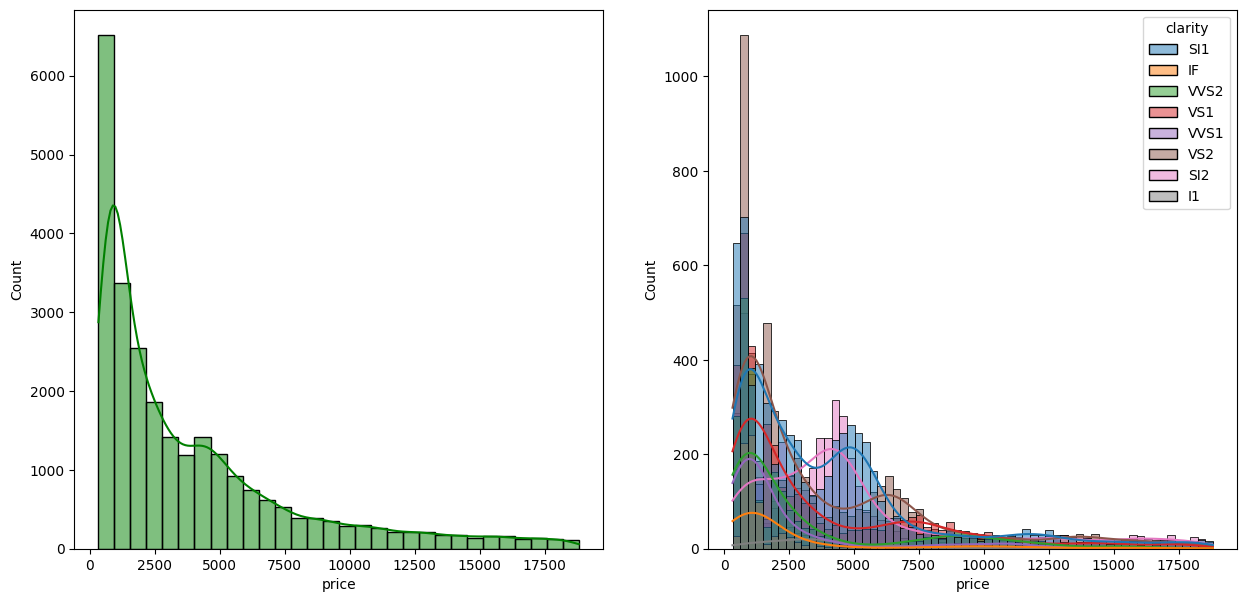

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='price',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='price',kde=True,hue='clarity')
plt.show()